## Homework 2 for CSC488 done by Ivan Akinfiev

### Problem 1

$\textit{Prove:}$


$$ \mathbb{E} \left [ (X-w)^2 \right ] = \mathbb{E} \left [(X - \mu)^2 \right ]+ (\mu - w)^2  $$

$\textit{Proof:}$

$$ \mathbb{E} \left [ (X-w)^2 \right ] = \mathbb{E} \left [ (X - \mu + \mu - w)^2 \right ] =  $$
$$ \mathbb{E} \left [(X-\mu)^2 + 2(X-\mu)(X+\mu) + (\mu - w)^2 \right] = $$ 
$$ \mathbb{E} \left [(X-\mu)^2 \right ] + \mathbb{E} \left [ (2(X-\mu)(X+\mu) \right ] + \left [ (\mu-w)^2 \right ] = $$  
$$ \mathbb{E} \left [(X-\mu)^2 \right ] + \left [ (\mu-w)^2 \right ], \; \text{since} \; \mathbb{E}(X) - \mu = 0, \; \text{so the middle term is 0} $$ 

### Problem 2 

### a) 

Having $ c = (c(1),...c(k)$), we need construct it in a way, so the cost for missclassification will equal always 1. So, 

Given $$ y \in \{1,2\} $$,
we should have 

$$ c = (c(1), c(2)) $$
and $$ c(h(z)) = \mathcal{1}\{h(x) \neq y\}$$. 

First, let's construct $z$. Let 

$$ z(0) = x,  \;\; z(1) = y $$  

We need to choose a function c, s.t 

$$ c(\text{incorrect}\; y = 2) = (0,1)$$
$$ c(\text{incorrect}\; y = 1) = (1,0)$$


Therefore, let's choose c

$$c = ( \left (\mathcal{1}\{h(z(0))=1\}\cdot 1\{1 = z(1) \} \right ), \left (\mathcal{1}\{h(z(0)) = 2 \}\cdot 1 \{2 = z(1) \}\right ) ) $$

This combination of indicator fucntions correctly assigns 0-1 cost when there is missclassification. 

For example, taking the expected value with one correct and one incorrect gives: 

$$ \mathbb{E}[( \left (\mathcal{1}\{h(z(0))=1\}\cdot 1\{1 = z(1) \} \right ), \left (\mathcal{1}\{h(z(0)) = 2 \}\cdot 1 \{2 = z(1) \}\right ) )\cdot$$ 
$$ ( \left (\mathcal{1}\{h(z(0))=1\}\cdot 1\{1 = z(1) \} \right ), \left (\mathcal{1}\{h(z(0)) = 2 \}\cdot 1 \{2 = z(1) \}\right ) )] =$$
$$ (1 + 0 )/ 2 = 0.5 $$

 which is equal to 0-1 loss. 






### b) 

Using the uniform convergence theorem the following holds:
$$ |L(h, \mathcal{D}) - L(h, S)| \leq \epsilon(m,\delta) $$

We use  Hoeffding's inequality, which gives us a classical  result from Shai et.al :

$$ \epsilon(m,\delta) = \sqrt{\frac{\log(|H|) + \log(2/\delta)}{2m}} $$
The following holds for the ERM $ \hat{h} $:

$$ L(\hat{h}, \mathcal{D}) \leq L(\hat{h}, S) + \epsilon(m, \delta)$$ 
and
$$ L(h^*, S) \leq L(h^*, \mathcal{D}) + \epsilon(m,\delta) $$

Combining these inequalities, we get:
$$ L(\hat{h},\mathcal{D}) - L(h^*, \mathcal{D}) \leq L(\hat{h}, S) - L(h^*, S) + 2\epsilon(m,\delta) \leq 2\epsilon(m, \delta) $$
the upper bound is: 
$$ L(\hat{h}, \mathcal{D}) - \min_{h'\in H} L(h', \mathcal{D}) \leq 2\sqrt{\frac{\log(|H|) + \log(2/\delta)}{2m}} $$


### Problem 3

Since $$\mathbb{P} \left (err(\hat{h},\mathcal{D}) - min_{h \in \mathcal{H}}err(h,\mathcal{D}) < \epsilon \right ) \geq \frac{1}{10}$$
and, as we iterate algorithm $\mathcal{B}$ k times, we will fail to find effective $h$ $9/10$ times. Therefore, overall probability will be 
$$ 1 - \left( \frac{9}{10} \right)^k = 1 - \exp(k \ln(9/10)) \ge 1 - \delta $$

So we need to set an upper bound by $\epsilon$, so will understand how many learners we need to get for any amount $k$.



$$ k \cdot \text{log}\left (\frac{9}{10} \right ) \leq \text{log}(\frac{1}{\delta})$$
So, $$ k > \left \lceil \frac{\text{log}(1/\delta)}{\text{log}(9/10)} \right \rceil$$


Let's Hoeffding's inequality first, 

$$ \mathbb{P} \left [ \left | \frac{1}{m}\sum_{i=1}^{m}\theta_i - \mu \right | > \epsilon \right ] \leq 2 \cdot exp(-2m\epsilon^2)$$
Then, 
$$ \mathcal{D}^m \{S: \exist h \in \mathcal{H}, |L_S(h) - L_{\mathcal{D}}| > \epsilon |\} \leq 2 | \mathcal{H}|exp(-2m\epsilon^2)$$
From Shai et.al we know that, 
$ m_{\mathcal{H}}(\delta,\epsilon) \leq m_{\mathcal{H}}^{UC}(\delta, \frac{\epsilon}{2}) $,
so it is rational to pick $ \mathcal{B}(\frac{\epsilon}{2})$ to find sample complexity. So, 
choosing $ m $, while having $\epsilon/2$, we get, 

$$ m \geq \frac{2 \cdot log\left (2\left(\left \lceil \frac{\text{log}(1/\delta)}{\text{log}(9/10)} \right \rceil \right )/\delta \right )}{\epsilon^2}  $$



### Problem 4

In [1]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns 


In [4]:
ms = [2**i for i in range(3, 11)]
ms

[8, 16, 32, 64, 128, 256, 512, 1024]

In [89]:
def generate_data(m, theta):
    output = []
    for i in range(m):
        x = np.random.uniform(size=1)
        if x > theta:
            output.append((x,1))
        else: 
            output.append((x,-1))
    return output

            

In [90]:
generate_data(8, 1/2)

[(array([0.43880041]), -1),
 (array([0.22247928]), -1),
 (array([0.83604399]), 1),
 (array([0.99834936]), 1),
 (array([0.75389328]), 1),
 (array([0.80240644]), 1),
 (array([0.33880846]), -1),
 (array([0.81279291]), 1)]

In [91]:
def erm_learn_theta(data, theta = 0):
    min_neg = 0
    max_pos = 1
    for i in range(len(data)):
        if data[i][0] > theta:
            if data[i][1] == 1:
                continue
            else: 
                theta = data[i][0]
        else: 
            if data[i][1] == -1:
                continue
            else:
                theta = data[i][0]
    return np.abs(theta - 1/2)

erm_learn_theta(generate_data(8, 1/2))


array([0.10132803])

It seems that in this case out generalization error will be just a difference between underlying distribution and the learned parameter. 

$$ err(\hat{h_m},\mathcal{D}) =  | \hat{\theta} - \theta |  $$ 

In [92]:
def evaluate_over_all_m(m_s):
    avg_errors = []
    for m in m_s:
        part_errors = []
        for i in range(200):
            data = generate_data(m, 1/2)
            part_errors.append(erm_learn_theta(data))
        avg_errors.append(sum(part_errors)/len(part_errors))
    return avg_errors
            
            
eval = evaluate_over_all_m(ms)
eval 

[array([0.11313296]),
 array([0.05714823]),
 array([0.02998369]),
 array([0.01523967]),
 array([0.00688693]),
 array([0.00371102]),
 array([0.00192506]),
 array([0.00098791])]

### b) 

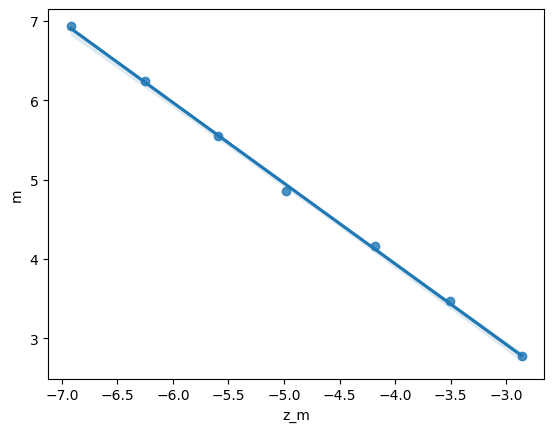

In [107]:
def generate_regression(data, m_s):
    for i in range(len(m_s)):
        data[i]= np.log(data[i])
        m_s[i] = np.log(m_s[i])
        data = np.array(data)
        data = np.squeeze(data)
        m_s = np.array(m_s)
        m_s = np.squeeze(m_s)
        
    df = pd.DataFrame({'m': m_s, 'z_m':data})
    #lm = sm.OLS(data, m_s).fit()
    return df

df = generate_regression(eval, ms)
sns.regplot(x='z_m', y='m', data=df)
plt.show()
    
        

### Problem 5 

~15 Hours. 1 and 4 problem took me 25 miuntes combined, and 2 and 3 all remaining time.........